# Reading MIDI
- Original code by FMP notebook (https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_MIDI.html)

In [52]:
import os
import sys

from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colors
import pretty_midi
import pandas as pd
import IPython.display as ipd
import libfmp.c1

In [77]:
midi_file = os.path.join('./', 'MIDI', 'midi_076_midi.mid')
midi_data = pretty_midi.PrettyMIDI(midi_file)

c:\users\delsys\musec\env\lib\site-packages\pretty_midi\pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


      Start  Duration  Pitch  Velocity Instrument
0  0.000000  0.433877     64        80           
1  0.434783  0.433877     66        80           
2  0.869566  0.433877     69        80           
3  1.304349  1.303443     73        80           
4  1.304349  1.738226     47        80           
5  1.304349  1.738226     50        80           
6  1.304349  1.738226     54        80           
7  2.608698  0.216486     73        80           
8  2.826090  0.216486     71        80           
9  3.043481  1.738226     52        80           


(<Figure size 576x216 with 1 Axes>,
 <AxesSubplot:xlabel='Time (seconds)', ylabel='Pitch'>)

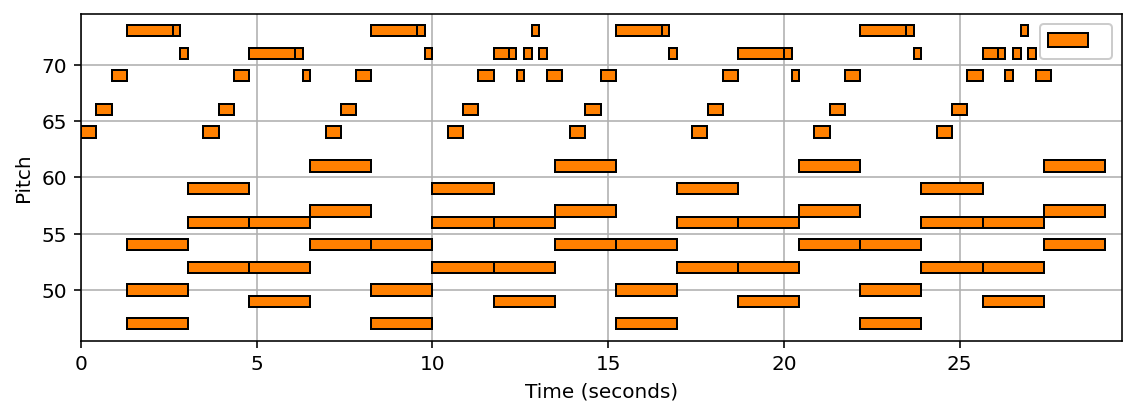

In [88]:
midi_list = []
for instrument in midi_data.instruments: #our midi files are without instrument labels
    for note in instrument.notes:
        start = note.start
        end = note.end
        duration = note.end - start
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, duration, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[3]))
df = pd.DataFrame(midi_list, columns=['Start', 'Duration', 'Pitch', 'Velocity', 'Instrument'])
# html = df.to_html(index=False)
# ipd.HTML(html)
print (df.head(10))
libfmp.c1.visualize_piano_roll(midi_list, figsize=(8,3), velocity_alpha=False)


### Generating MIDI with sinusoids

In [79]:
fs = 22050
audio_data = midi_data.synthesize(fs=fs)
ipd.Audio(audio_data, rate=fs)